In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
import nltk
import re
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from time import time
from nltk.corpus import stopwords
from pprint import pprint

# Load and prepare documents

In [22]:
df = pd.read_pickle("../data/cleaned_df")

In [23]:
df.head()

,question,cleaned,length,wc
0,Are you there?,are you there,13,3
1,Firstname:,firstname,9,1
2,I get irritated easily.,i get irritated easily,22,4
3,Comments,comments,8,1
4,Let's do a survey about exercising?,lets do a survey about exercising,33,6


In [24]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
# words from the wordcloud
stop_words.extend(['thank', 'please', 'whats', 'thanks', 'email', 'would', 'us', 'will', 'address', 
                   'question', 'questions', 'many', 'name', 'must', 'could', 'should'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# simple_preprocess: it lowercases, tokenizes, de-accents (optional) with deacc
def extract_words(questions):
    for q in questions:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(q), deacc=True))
        
def remove_stopwords(docs):
    # docs is a list of document. A document being a list of words
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in docs]
                

In [26]:
data = df.cleaned.values.tolist()
data[:10]

['are you there',
 'firstname',
 'i get irritated easily',
 'comments',
 'lets do a survey about exercising',
 'do you like our design',
 'thank you you are part of us now we will contact you with surprises soon',
 'have you ever paid for a service like this before',
 'what type of services are you interested in',
 'would you recommend indivirtual to other clients']

In [27]:
corpus = list(extract_words(data))
corpus[:10]

[['are', 'you', 'there'],
 ['firstname'],
 ['get', 'irritated', 'easily'],
 ['comments'],
 ['lets', 'do', 'survey', 'about', 'exercising'],
 ['do', 'you', 'like', 'our', 'design'],
 ['thank',
  'you',
  'you',
  'are',
  'part',
  'of',
  'us',
  'now',
  'we',
  'will',
  'contact',
  'you',
  'with',
  'surprises',
  'soon'],
 ['have', 'you', 'ever', 'paid', 'for', 'service', 'like', 'this', 'before'],
 ['what', 'type', 'of', 'services', 'are', 'you', 'interested', 'in'],
 ['would', 'you', 'recommend', 'indivirtual', 'to', 'other', 'clients']]

In [28]:
corpus_sw = remove_stopwords(corpus)
len(corpus_sw)

4306

In [29]:
corpus_sw[:10]

[[],
 ['firstname'],
 ['get', 'irritated', 'easily'],
 ['comments'],
 ['lets', 'survey', 'exercising'],
 ['like', 'design'],
 ['part', 'contact', 'surprises', 'soon'],
 ['ever', 'paid', 'service', 'like'],
 ['type', 'services', 'interested'],
 ['recommend', 'indivirtual', 'clients']]

We might have now some empty lists. Need to remove them.

In [30]:
def remove_empty_list(docs):
    return [doc for doc in docs if len(doc)>0]   

In [31]:
final_corpus = remove_empty_list(corpus_sw)

In [32]:
final_corpus[:10]

[['firstname'],
 ['get', 'irritated', 'easily'],
 ['comments'],
 ['lets', 'survey', 'exercising'],
 ['like', 'design'],
 ['part', 'contact', 'surprises', 'soon'],
 ['ever', 'paid', 'service', 'like'],
 ['type', 'services', 'interested'],
 ['recommend', 'indivirtual', 'clients'],
 ['select', 'bunch', 'stuff']]

In [33]:
# Create Dictionary
id2word = corpora.Dictionary(final_corpus)

# Convert document (a list of words) into the bag-of-words
# Each word is assumed to be a tokenized and normalized ( (either unicode or utf8-encoded).)
corpus = [id2word.doc2bow(doc) for doc in final_corpus]

In [34]:
corpus[:10]

[[(0, 1)],
 [(1, 1), (2, 1), (3, 1)],
 [(4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1)],
 [(9, 1), (14, 1), (15, 1), (16, 1)],
 [(17, 1), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1)],
 [(23, 1), (24, 1), (25, 1)]]

# LDA 5 Topics

In [47]:
# let´s start with 5 topics
num_topics = 5

# Build LDA model
lda_model5 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42)

# Print the key words for the 5 topics
pprint(lda_model5.print_topics())


[(0,
  '0.010*"time" + 0.009*"get" + 0.009*"much" + 0.007*"comments" + '
  '0.007*"survey" + 0.007*"website" + 0.007*"project" + 0.006*"done" + '
  '0.006*"soon" + 0.006*"improve"'),
 (1,
  '0.015*"favorite" + 0.013*"much" + 0.012*"rate" + 0.011*"website" + '
  '0.010*"type" + 0.009*"work" + 0.008*"like" + 0.007*"business" + '
  '0.007*"team" + 0.006*"contact"'),
 (2,
  '0.024*"like" + 0.014*"enter" + 0.012*"time" + 0.011*"want" + 0.010*"one" + '
  '0.009*"service" + 0.009*"think" + 0.008*"old" + 0.007*"comments" + '
  '0.006*"often"'),
 (3,
  '0.047*"like" + 0.012*"know" + 0.011*"help" + 0.010*"tell" + 0.008*"contact" '
  '+ 0.008*"one" + 0.007*"feedback" + 0.007*"use" + 0.007*"rate" + '
  '0.007*"first"'),
 (4,
  '0.013*"company" + 0.012*"form" + 0.010*"use" + 0.009*"project" + '
  '0.008*"age" + 0.007*"rate" + 0.007*"feel" + 0.007*"phone" + 0.007*"welcome" '
  '+ 0.007*"like"')]


# LDA 3 Topics

In [48]:
num_topics = 3
lda_model3 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42)
doc_lda3 = lda_model3[corpus]

In [49]:
# Print the key words for the 3 topics
pprint(lda_model3.print_topics())

[(0,
  '0.008*"time" + 0.007*"project" + 0.007*"get" + 0.007*"much" + 0.007*"use" + '
  '0.007*"welcome" + 0.006*"comments" + 0.006*"best" + 0.006*"see" + '
  '0.006*"survey"'),
 (1,
  '0.014*"like" + 0.010*"rate" + 0.010*"favorite" + 0.009*"much" + '
  '0.009*"website" + 0.008*"contact" + 0.008*"first" + 0.007*"number" + '
  '0.006*"know" + 0.006*"type"'),
 (2,
  '0.038*"like" + 0.010*"one" + 0.009*"think" + 0.009*"time" + 0.008*"enter" + '
  '0.008*"help" + 0.007*"want" + 0.007*"survey" + 0.007*"make" + '
  '0.007*"taking"')]


# LDA 7 Topics

In [50]:
num_topics = 7
lda_model7 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42)

In [51]:
# Print the key words for the 7 topics
pprint(lda_model7.print_topics())

[(0,
  '0.014*"time" + 0.010*"comments" + 0.010*"much" + 0.007*"get" + 0.007*"done" '
  '+ 0.006*"following" + 0.006*"website" + 0.006*"date" + 0.006*"use" + '
  '0.005*"project"'),
 (1,
  '0.018*"favorite" + 0.014*"rate" + 0.013*"website" + 0.011*"much" + '
  '0.010*"business" + 0.010*"type" + 0.009*"work" + 0.008*"like" + '
  '0.008*"contact" + 0.008*"number"'),
 (2,
  '0.036*"like" + 0.015*"enter" + 0.012*"want" + 0.012*"time" + 0.012*"one" + '
  '0.011*"old" + 0.008*"make" + 0.008*"service" + 0.008*"else" + '
  '0.008*"anything"'),
 (3,
  '0.049*"like" + 0.012*"one" + 0.012*"tell" + 0.010*"first" + 0.010*"know" + '
  '0.009*"help" + 0.009*"contact" + 0.008*"use" + 0.007*"next" + 0.007*"see"'),
 (4,
  '0.014*"company" + 0.012*"form" + 0.012*"use" + 0.011*"website" + '
  '0.009*"comments" + 0.008*"project" + 0.008*"like" + 0.008*"rate" + '
  '0.008*"feel" + 0.007*"people"'),
 (5,
  '0.016*"survey" + 0.015*"think" + 0.015*"much" + 0.012*"like" + 0.011*"best" '
  '+ 0.010*"taking" + 0.

# Asking topic distribution per documents

In [52]:
lda_model5[corpus[10]]

[(0, 0.102428354),
 (1, 0.5933935),
 (2, 0.10128215),
 (3, 0.100846924),
 (4, 0.10204905)]

In [53]:
lda_model3[corpus[10]]

[(0, 0.18981844), (1, 0.63009566), (2, 0.18008593)]

In [54]:
lda_model7[corpus[10]]

[(0, 0.07165535),
 (1, 0.5703324),
 (2, 0.07156853),
 (3, 0.07158237),
 (4, 0.071883604),
 (5, 0.07148297),
 (6, 0.071494795)]

For such a small amount of documents, maybe it makes more sense to have less topics, increasing the probability of each document to be represented by one of them.

In [55]:
def topics_doc_to_df(topics_doc, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_doc:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

def get_docs_dist_per_topic(model, corpus, num_topics):
    topics = [model[corpus[i]] for i in range(len(corpus))]
    # topic weighting matrix
    topics_df = pd.concat([topics_doc_to_df(topics_doc, num_topics) 
                                for topics_doc in topics]).reset_index(drop=True).fillna(0)
    return topics_df

In [56]:
topics5_df = get_docs_dist_per_topic(lda_model5, corpus, 5)
topics3_df = get_docs_dist_per_topic(lda_model3, corpus, 3)
topics7_df = get_docs_dist_per_topic(lda_model7, corpus, 7)

In [57]:
topics5_df.head()

,0,1,2,3,4
0,0.100041,0.100039,0.599843,0.100036,0.100041
1,0.799022,0.050241,0.050250,0.050153,0.050333
2,0.592794,0.100015,0.104210,0.100336,0.102645
3,0.051078,0.050311,0.796910,0.051249,0.050451
4,0.067598,0.067328,0.067600,0.729648,0.067827


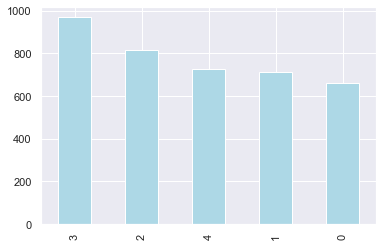

In [58]:
import seaborn as sns
sns.set(style="darkgrid", palette="viridis")
topics5_df.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

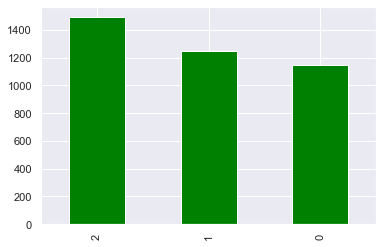

In [59]:
topics3_df.idxmax(axis=1).value_counts().plot.bar(color='green')

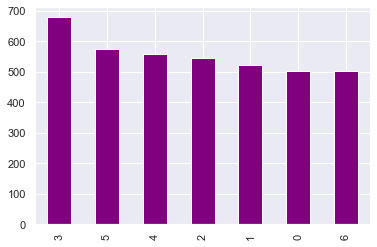

In [60]:
topics7_df.idxmax(axis=1).value_counts().plot.bar(color='purple')

# Visualizing the topics

In [61]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import os

In [62]:
def generate_html_vis_file(model, num_topics, id2word, corpus):
    # Visualize the topics
    pyLDAvis.enable_notebook()
    LDAvis_filepath = os.path.join('../data/ldavis_'+str(num_topics)+'_topics')
    
    # feed the LDA model into the pyLDAvis instance
    LDAvis_prepared = gensimvis.prepare(model, corpus, id2word)
    with open(LDAvis_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    with open(LDAvis_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, '../data/ldavis_'+ str(num_topics)+'_topics' +'.html')

In [75]:
generate_html_vis_file(lda_model5, 5, id2word, corpus)

In [76]:
generate_html_vis_file(lda_model3, 3, id2word, corpus)

In [77]:
generate_html_vis_file(lda_model7, 7, id2word, corpus)

   **Alpha parameter**: is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.

   **Beta parameter**: is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

Setting lambda = 1 results in the familiar ranking of terms in decreasing order of their topic-specific probability, 
and setting lambda = 0 ranks terms solely by their lift. We wish to learn an “optimal” value of lambda for topic interpretation.

See https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf page 4 to interpret lambda formula.

# Predicting new documents

In [66]:
new_q = "Which is your job role?"

We need to repeat the same cleaning steps as we did for the topic analysis.

In [67]:
def prepare_input(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = simple_preprocess(text, deacc=True)
    #print(tokens)
    return [token for token in tokens if token not in stop_words]

In [68]:
doc = prepare_input(new_q)
doc

['job', 'role']

In [70]:
lda_model5[id2word.doc2bow(doc)]

[(0, 0.73210394),
 (1, 0.06745302),
 (2, 0.06667223),
 (3, 0.06667185),
 (4, 0.06709901)]

In [71]:
new_q2 = 'Sign up to become a paid customer and get an exclusive discount on your next purchase of $50 or more'

In [72]:
lda_model5[id2word.doc2bow(prepare_input(new_q2))]

[(0, 0.022824163),
 (1, 0.022609036),
 (2, 0.5788977),
 (3, 0.35253873),
 (4, 0.02313039)]

In [73]:
lda_model3[id2word.doc2bow(prepare_input(new_q2))]

[(0, 0.048912156), (1, 0.28459793), (2, 0.6664899)]

In [74]:
lda_model7[id2word.doc2bow(prepare_input(new_q2))]

[(0, 0.015955722),
 (1, 0.01595357),
 (2, 0.22907962),
 (3, 0.015976027),
 (4, 0.6911628),
 (5, 0.015919302),
 (6, 0.015952922)]

## Conclusion